In [54]:
import numpy as np
import pandas as pd

In [55]:
f = open("./data/data.vrp", "r")

dimension = 0
capacity = []
depot_index = []
coordinate_section = False
demand_section = False
depot_section = False
route_type = ""

coodinates = []
parameters = []

for l in f.readlines():
    if "CAPACITY :" in l:
        capacity.append(int(l.split("CAPACITY :")[-1]))
        continue
    elif "DIMENSION :" in l:
        dimension = int(l.split("DIMENSION :")[-1])
        continue

    elif l == "NODE_COORD_SECTION\n":
        coordinate_section = True
        demand_section = False
        depot_section = False
        continue

    elif l == "DEMAND_SECTION\n":
        coordinate_section = False
        demand_section = True
        depot_section = False
        continue

    elif l == "DEPOT_SECTION\n":
        coordinate_section = False
        demand_section = False
        depot_section = True
        continue

    elif l == "EOF\n":
        break

    
    if coordinate_section:
        coordinate = l.split()[1:]
        coordinate = [float(_) for _ in coordinate]
        coodinates.append(coordinate)
        continue
    
    if demand_section:
        demand = [int(l.split()[-1]),0,0,0,0]
        parameters.append(demand)
        continue

    if depot_section:
        number = int(l.split()[-1])
        if number != -1:
            depot_index.append(number)

coordinates = np.array(coodinates)
parameters = np.array(parameters)

# pyVRP

In [56]:
#pyvrp
from pyVRP.pyVRP import build_distance_matrix, genetic_algorithm_vrp, plot_tour_coordinates

In [57]:
distance_matrix = build_distance_matrix(coordinates)

In [58]:
n_depots = len(depot_index) 
time_window = 'without' 
route_type = 'closed'
model_type = 'vrp'
graph = False
vehicle_types = 1
fleet_size    = [ 8 ]     

##cost:
fixed_cost    = [ 0  ]     
variable_cost = [ 1  ]     

##velocity:
velocity      = [ 1  ]

#GA parameters:
## Penalty Value for Violating the Problem Constraints
penalty_value   = 2000
## Population Size     
population_size = 100
## Mutation Rate       
mutation_rate   = 0.5
## Elite Member(s) - Total Number of Best Individual(s) that (is)are Maintained    
elite           = 1
## Number of Generations        
generations     = 25000

In [59]:
ga_report, ga_vrp = genetic_algorithm_vrp(coordinates, distance_matrix, parameters, velocity, fixed_cost, variable_cost, capacity, population_size, vehicle_types, n_depots, route_type, model_type, time_window, fleet_size, mutation_rate, elite, generations, penalty_value, graph)

Generation =  0  Distance =  3423.27  f(x) =  179423.27
Generation =  1  Distance =  3423.27  f(x) =  179423.27
Generation =  2  Distance =  3423.27  f(x) =  179423.27
Generation =  3  Distance =  3423.27  f(x) =  179423.27
Generation =  4  Distance =  3423.27  f(x) =  179423.27
Generation =  5  Distance =  3324.04  f(x) =  3324.04
Generation =  6  Distance =  3235.96  f(x) =  3235.96
Generation =  7  Distance =  3163.7  f(x) =  3163.7
Generation =  8  Distance =  3120.51  f(x) =  3120.51
Generation =  9  Distance =  3045.93  f(x) =  3045.93
Generation =  10  Distance =  3036.55  f(x) =  3036.55
Generation =  11  Distance =  3002.71  f(x) =  3002.71
Generation =  12  Distance =  2984.28  f(x) =  2984.28
Generation =  13  Distance =  2984.28  f(x) =  2984.28
Generation =  14  Distance =  2961.79  f(x) =  2961.79
Generation =  15  Distance =  2961.79  f(x) =  2961.79
Generation =  16  Distance =  2915.78  f(x) =  2915.78
Generation =  17  Distance =  2915.78  f(x) =  2915.78
Generation =

: 

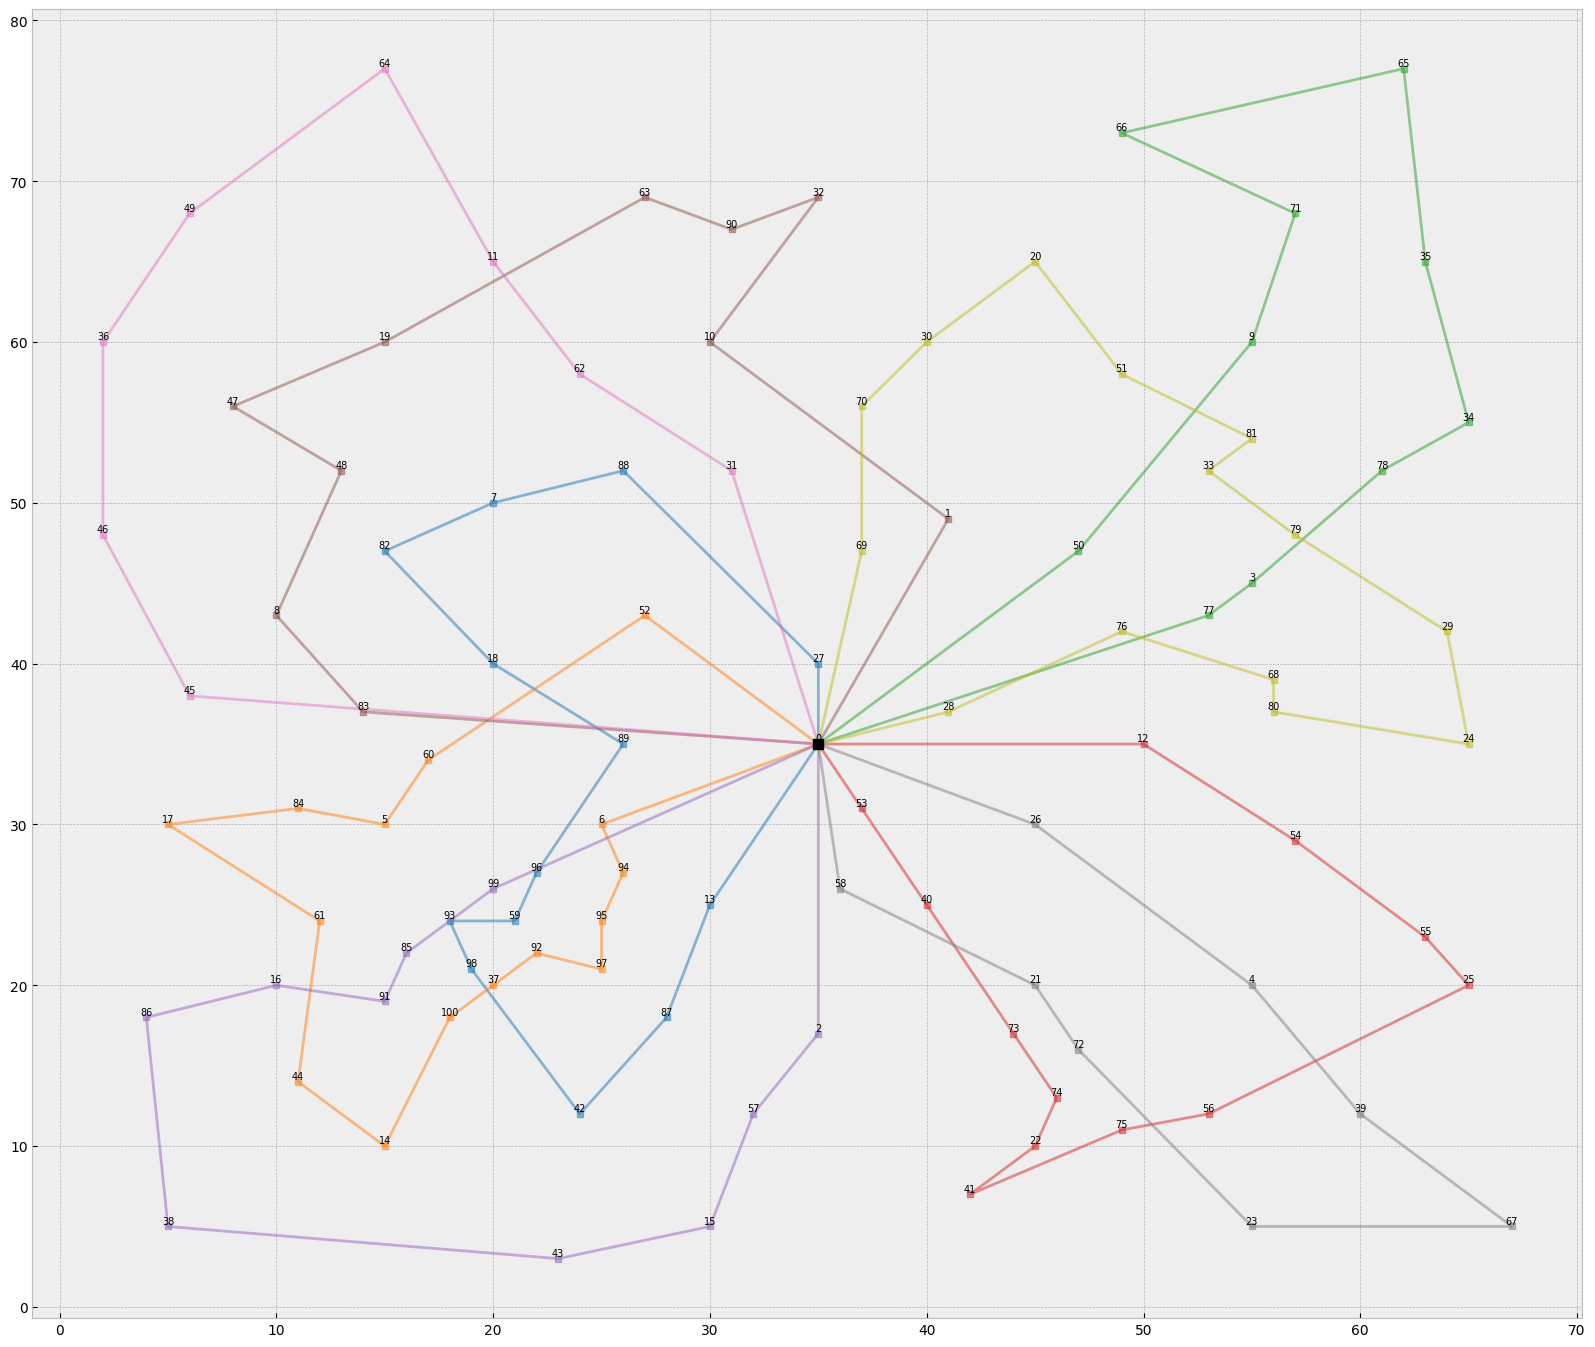

In [33]:
#size_x, size_y：size of figure
plot_tour_coordinates(coordinates, ga_vrp, n_depots = n_depots, route = route_type, size_x = 20, size_y = 17)

In [10]:
#save report
ga_report.to_csv('./result/VRP-01-Report-withpyVRP.csv', sep = ';', index = False)

# VRPSolverEasy

In [6]:
import VRPSolverEasy
import numpy as np
import pandas as pd

In [7]:
model = VRPSolverEasy.Model()
n_rows = coordinates.shape[0]

for id in range(n_rows):
    demand, tw_begin, tw_end, service_time, penalty = parameters[id]
    demand = demand.item()
    tw_begin = tw_begin.item()
    tw_end = tw_end.item()
    service_time = service_time.item()
    penalty = penalty.item()
    if id == 0:
        model.add_depot(id = id, name="depot", service_time=service_time, tw_begin=tw_begin,tw_end = tw_end)
    else:
        model.add_customer(id = id, id_customer = id, name='customer_{}'.format(id), demand=demand, penalty=penalty, service_time = service_time, tw_begin=tw_begin, tw_end = tw_end)


In [8]:
n_rows,n_col = distance_matrix.shape
point_list = model.points
for id_from in range(n_rows):
    distance_data = distance_matrix[id_from]
    name_from = point_list[id_from].name
    for id_to in range(id_from+1, n_col):
        name_to = point_list[id_to].name
        model.add_link(start_point_id=id_from, end_point_id= id_to, name="{}--{}".format(name_from, name_to), is_directed=False, distance=distance_data[id_to])

In [11]:
model.add_vehicle_type(id=1, start_point_id=0, end_point_id=0, name="vehicle1", capacity=capacity[0], max_number=fleet_size[0], fixed_cost=0, var_cost_dist=1)

In [12]:
model.set_parameters(time_limit=3000,solver_name="CLP")

In [13]:
model.solve()

In [14]:
model.solution.is_defined()

True

In [15]:
print(model.solution)


Solution cost : 826.1369729542497 
 
Route for vehicle 1:
 ID : 0 --> 50 --> 33 --> 81 --> 51 --> 9 --> 71 --> 65 --> 35 --> 34 --> 78 --> 79 --> 3 --> 77 --> 76 --> 0
 Name : depot --> customer_50 --> customer_33 --> customer_81 --> customer_51 --> customer_9 --> customer_71 --> customer_65 --> customer_35 --> customer_34 --> customer_78 --> customer_79 --> customer_3 --> customer_77 --> customer_76 --> depot
 Load : 0.0 --> 13.0 --> 24.0 --> 50.0 --> 60.0 --> 76.0 --> 91.0 --> 111.0 --> 119.0 --> 133.0 --> 136.0 --> 159.0 --> 172.0 --> 186.0 --> 199.0 --> 199.0
Total cost : 118.79278653641366
 
Route for vehicle 1:
 ID : 0 --> 52 --> 7 --> 82 --> 48 --> 19 --> 11 --> 64 --> 49 --> 36 --> 47 --> 46 --> 8 --> 83 --> 18 --> 0
 Name : depot --> customer_52 --> customer_7 --> customer_82 --> customer_48 --> customer_19 --> customer_11 --> customer_64 --> customer_49 --> customer_36 --> customer_47 --> customer_46 --> customer_8 --> customer_83 --> customer_18 --> depot
 Load : 0.0 --> 9.

In [16]:
# draw the result
from itertools import cycle
from matplotlib import pyplot as plt

#solution needs model.solution from VRPSolver
#route_type: string. closed or open
def plot_tour_coordinates (coordinates, solution:VRPSolverEasy.Solution, n_depots, route_type, size_x = 10, size_y = 10):
    routes = solution.routes
    depot     = [[routes[r_index].point_ids[0]] for r_index in range(len(routes))]
    city_tour = [routes[r_index].point_ids[1:-1] for r_index in range(len(routes))]
    cycol     = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#bf77f6', '#ff9408', 
                       '#d1ffbd', '#c85a53', '#3a18b1', '#ff796c', '#04d8b2', '#ffb07c', '#aaa662', '#0485d1', '#fffe7a', '#b0dd16', '#d85679', '#12e193', 
                       '#82cafc', '#ac9362', '#f8481c', '#c292a1', '#c0fa8b', '#ca7b80', '#f4d054', '#fbdd7e', '#ffff7e', '#cd7584', '#f9bc08', '#c7c10c'])
    plt.figure(figsize = [size_x, size_y])
    for j in range(0, len(city_tour)):
        if (route_type == 'closed'):
            xy = np.zeros((len(city_tour[j]) + 2, 2))
        else:
            xy = np.zeros((len(city_tour[j]) + 1, 2))
        for i in range(0, xy.shape[0]):
            if (i == 0):
                xy[ i, 0] = coordinates[depot[j][i], 0]
                xy[ i, 1] = coordinates[depot[j][i], 1]
                if (route_type == 'closed'):
                    xy[-1, 0] = coordinates[depot[j][i], 0]
                    xy[-1, 1] = coordinates[depot[j][i], 1]
            if (i > 0 and i < len(city_tour[j])+1):
                xy[i, 0] = coordinates[city_tour[j][i-1], 0]
                xy[i, 1] = coordinates[city_tour[j][i-1], 1]
        plt.plot(xy[:,0], xy[:,1], marker = 's', alpha = 0.5, markersize = 5, color = next(cycol))
    for i in range(0, coordinates.shape[0]):
        if (i < n_depots):
            plt.plot(coordinates[i,0], coordinates[i,1], marker = 's', alpha = 1.0, markersize = 7, color = 'k')[0]
            plt.text(coordinates[i,0], coordinates[i,1] + 0.04, i, ha = 'center', va = 'bottom', color = 'k', fontsize = 7)
        else:
            plt.text(coordinates[i,0],  coordinates[i,1] + 0.04, i, ha = 'center', va = 'bottom', color = 'k', fontsize = 7)
    return

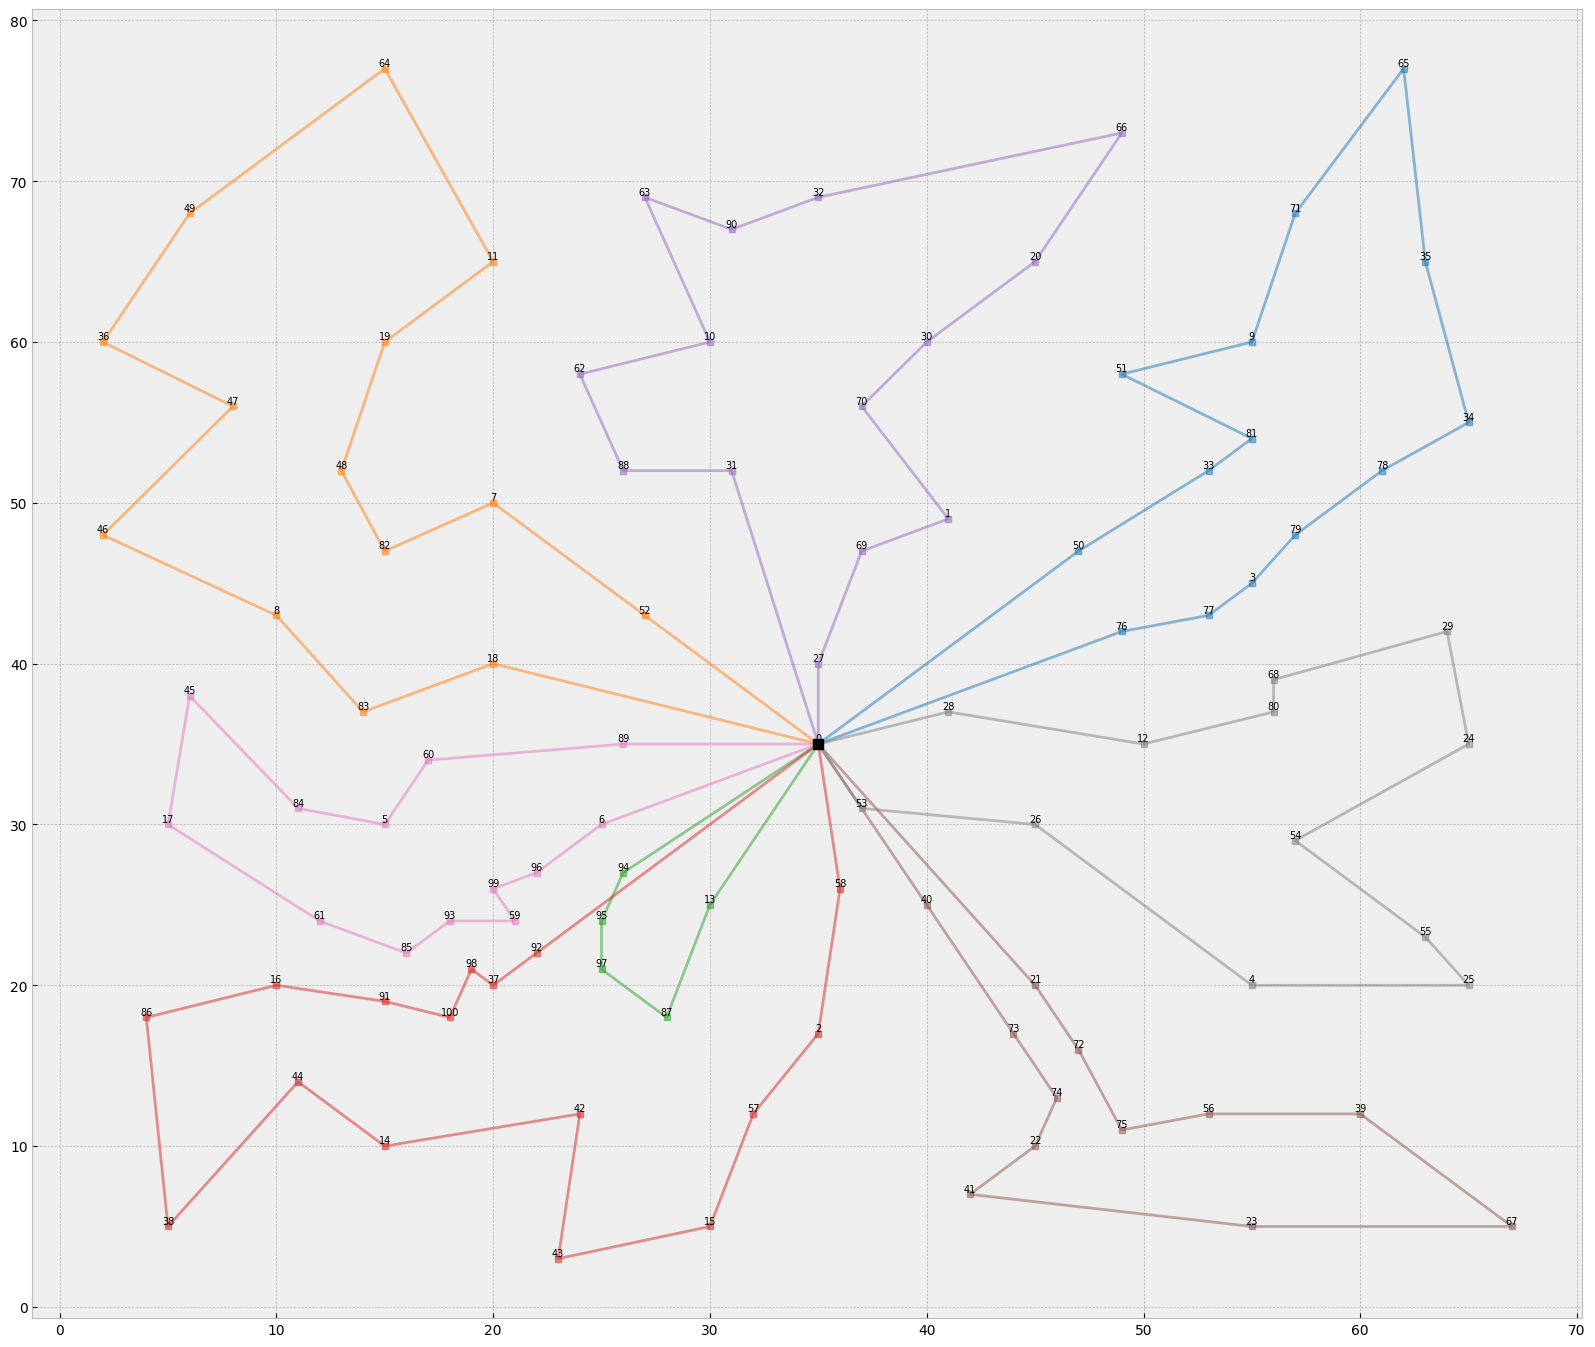

In [17]:
plot_tour_coordinates(coordinates=coordinates, solution=model.solution, n_depots=1, route_type='closed', size_x=20, size_y = 17)